In [ ]:
  !pip install basemap

In [ ]:
import numpy as np
import gzip
import shutil
import os
import re
import matplotlib.pyplot as plt
import struct
from mpl_toolkits.basemap import Basemap

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/UNet Model/Sample data/"
dir_list = os.listdir(path)

In [ ]:
dir_list

['bglob0512031245.bin.gz',
 'bglob0909071545.bin.gz',
 'bglob2201010345.bin.gz',
 'bglob2201010315.bin.gz']

In [ ]:
#load bin file
file_ir = path + dir_list[0]
tmpn = '/tmp/' + os.path.basename(file_ir[:-3])  # Remove '.gz'
# Gunzip to /tmp file first
with gzip.open(file_ir, 'rb') as f_in:
    with open(tmpn, 'wb') as f_out:
        f_out.write(f_in.read())
# Read the binary file
with open(tmpn, 'rb') as f:
    om= np.array(struct.unpack(f'>{27000000}h', f.read()), dtype=np.int16)
# Reshape the array according to dimensions
om = om.reshape([3000,9000])
os.remove(tmpn)
ir = om.astype(np.float64) / 100
ir = np.concatenate((ir[:, 4500:], ir[:, :4500]), axis=1)

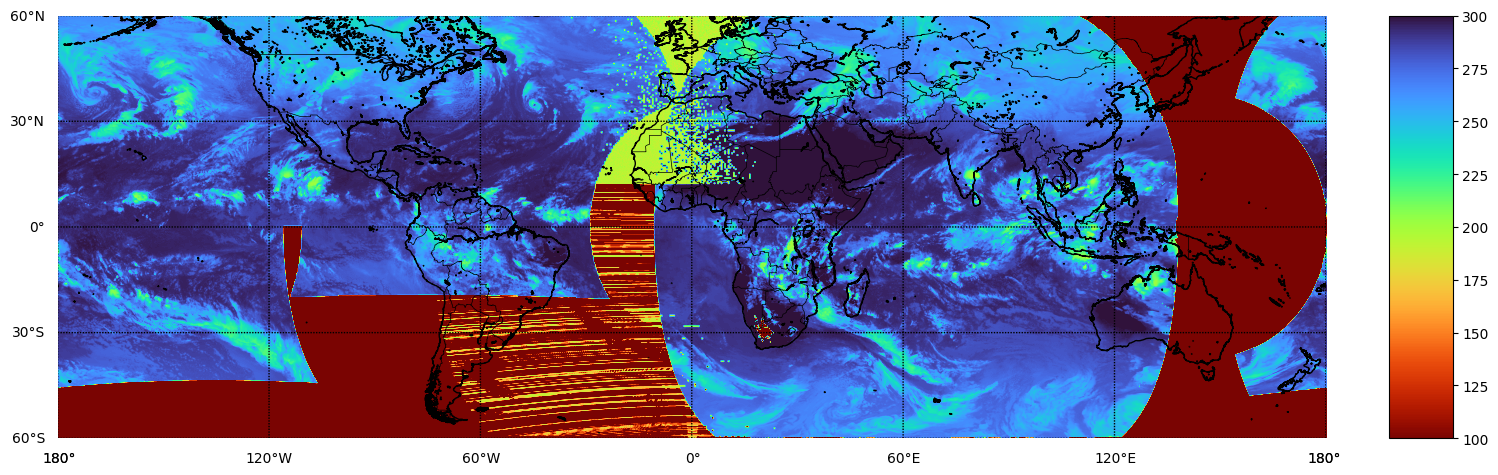

In [ ]:
 fig, ax = plt.subplots(figsize=(18, 8))
# Create the Basemap
m = Basemap(projection='cyl', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='i', ax=ax)
# Transform the image coordinates to fit the map projection
# For the 'merc' projection, use the map's x and y dimensions
x = np.linspace(-180, 180, ir.shape[1])
y = np.linspace(-60, 60, ir.shape[0])
xx, yy = np.meshgrid(x, y)
x_map, y_map = m(xx, yy)

# Plot the image data using Basemap's imshow
im= m.imshow(ir, cmap='turbo_r',origin='upper', extent=[x_map.min(), x_map.max(), y_map.min(), y_map.max()])
im.set_clim(100, 300)  # Adjust these values based on your data
cbar = m.colorbar(im, location='right', pad="5%")
# Draw the basemap features
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-60., 61., 30.), labels=[True, False, False, False])
m.drawmeridians(np.arange(-180., 181., 60.), labels=[False, False, False, True])
# Remove axes
ax.axis('off')

plt.show()